# Spam Email Tahmini (Random Forest:%97 başarı)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud

pd.set_option('display.max_columns', 100)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [29]:
df=pd.read_csv("emails.csv", encoding="latin-1")

In [30]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,e,any,our,corp,can,d,all,has,was,...,especially,dorcheus,del,millions,insurance,pooling,trial,tennessee,ellis,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,15,141,0,21,1,1,39,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,10,79,0,0,0,1,21,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,10,71,0,0,0,1,11,8,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
df.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,e,any,our,corp,can,d,all,has,was,...,especially,dorcheus,del,millions,insurance,pooling,trial,tennessee,ellis,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,5,6,1,0,0,20,1,0,0,1,0,0,3,0,18,1,5,0,0,2,2,0,1,0,3,0,0,0,0,0,5,29,0,1,0,0,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,23,18,6,3,1,98,10,6,2,2,6,1,11,15,101,2,12,1,3,25,3,5,14,7,14,0,3,0,0,1,17,218,3,2,0,4,56,3,4,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,1,1,3,1,0,10,0,0,0,0,0,0,1,0,11,0,1,0,0,1,0,0,1,0,2,0,0,0,0,0,0,12,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,8,11,7,1,0,39,1,0,0,0,2,1,3,3,37,0,8,0,4,5,1,0,5,0,3,1,1,0,0,1,3,45,0,2,0,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,23,13,5,4,1,99,6,4,1,1,1,1,6,16,89,4,5,0,1,22,5,5,16,7,18,0,1,0,0,1,14,191,2,2,0,3,54,6,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
df.sample(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,e,any,our,corp,can,d,all,has,was,...,especially,dorcheus,del,millions,insurance,pooling,trial,tennessee,ellis,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
3595,Email 3596,6,6,3,6,0,3,52,3,0,9,3,4,1,2,53,2,1,1,1,0,2,13,2,33,0,8,0,2,4,1,0,5,0,6,0,1,0,0,2,4,80,0,2,0,0,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4327,Email 4328,1,0,1,0,0,0,5,1,0,1,1,0,0,0,7,1,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,17,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
393,Email 394,12,9,16,1,4,4,63,1,7,7,4,5,3,0,38,7,3,1,0,3,0,6,3,43,1,4,2,1,4,0,0,12,1,5,0,1,0,0,1,13,100,1,0,0,0,29,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
5010,Email 5011,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3503,Email 3504,0,2,1,2,0,1,32,1,0,4,6,1,0,0,24,2,0,0,0,0,0,0,1,20,0,1,0,0,4,0,0,2,0,2,0,1,0,0,0,6,45,1,0,0,0,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
612,Email 613,0,1,1,0,1,0,9,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,7,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2,11,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2441,Email 2442,0,5,1,0,0,2,49,0,0,10,11,5,2,0,38,1,0,0,0,0,0,5,2,33,0,6,1,2,6,0,0,2,0,6,0,2,0,0,1,5,70,0,0,0,0,13,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
847,Email 848,1,3,2,1,3,0,12,0,0,8,6,1,0,0,22,1,0,0,0,0,0,4,0,14,0,0,0,0,4,0,0,4,0,0,0,0,0,0,0,3,21,0,0,0,0,5,0,0,0,...,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3663,Email 3664,4,5,8,0,4,2,65,1,2,8,15,2,0,4,35,2,0,0,1,0,0,7,1,39,1,3,2,4,5,0,1,7,0,5,0,1,1,3,1,1,78,1,0,0,0,21,0,0,0,...,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
515,Email 516,36,29,8,19,4,6,190,39,1,52,33,17,6,0,139,6,4,1,2,1,12,13,6,176,10,13,2,9,17,2,0,20,4,18,0,3,0,0,0,38,322,6,12,1,0,79,5,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [33]:
df.shape

(5172, 3002)

In [39]:
#df.describe()

In [40]:
df.dropna(inplace=True)

In [41]:
df.shape

(5172, 3002)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [43]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [47]:
x = df.iloc[:,1:3001]
x

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,e,any,our,corp,can,d,all,has,was,know,...,clarification,especially,dorcheus,del,millions,insurance,pooling,trial,tennessee,ellis,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,15,141,0,21,1,1,39,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,10,79,0,0,0,1,21,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,10,71,0,0,0,1,11,8,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,6,1,0,0,20,1,0,0,1,0,0,3,0,18,1,5,0,0,2,2,0,1,0,3,0,0,0,0,0,5,29,0,1,0,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,18,6,3,1,98,10,6,2,2,6,1,11,15,101,2,12,1,3,25,3,5,14,7,14,0,3,0,0,1,17,218,3,2,0,4,56,3,4,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,1,3,1,0,10,0,0,0,0,0,0,1,0,11,0,1,0,0,1,0,0,1,0,2,0,0,0,0,0,0,12,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,11,7,1,0,39,1,0,0,0,2,1,3,3,37,0,8,0,4,5,1,0,5,0,3,1,1,0,0,1,3,45,0,2,0,1,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [48]:
y = df.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size = 0.2)

In [58]:
mnb=MultinomialNB()

In [59]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [60]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [61]:
tahmin=mnb.fit(x_train, y_train).predict(x_test)
tahmin2=r.fit(x_train, y_train).predict(x_test)
tahmin3=d.fit(x_train, y_train).predict(x_test)

In [62]:
confusion_matrix(tahmin, y_test)

array([[704,  12],
       [ 35, 284]], dtype=int64)

In [63]:
confusion_matrix(tahmin2, y_test)

array([[726,  14],
       [ 13, 282]], dtype=int64)

In [64]:
confusion_matrix(tahmin3, y_test)

array([[696,  39],
       [ 43, 257]], dtype=int64)

In [65]:
print(classification_report(tahmin, y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       716
           1       0.96      0.89      0.92       319

    accuracy                           0.95      1035
   macro avg       0.96      0.94      0.95      1035
weighted avg       0.95      0.95      0.95      1035



In [68]:
print(classification_report(tahmin2, y_test))              #en iyi tahmin Random Forest ile 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       740
           1       0.95      0.96      0.95       295

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [69]:
print(classification_report(tahmin3, y_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       735
           1       0.87      0.86      0.86       300

    accuracy                           0.92      1035
   macro avg       0.91      0.90      0.90      1035
weighted avg       0.92      0.92      0.92      1035



<AxesSubplot:>

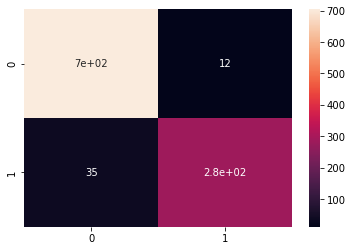

In [55]:
sns.heatmap(confusion_matrix(tahmin, y_test), annot=True)

<AxesSubplot:>

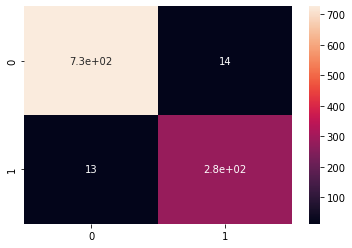

In [70]:
sns.heatmap(confusion_matrix(tahmin2, y_test), annot=True)

<AxesSubplot:>

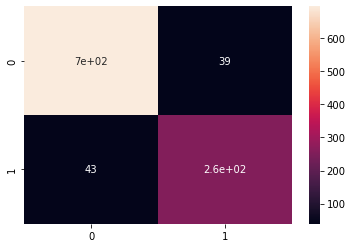

In [71]:
sns.heatmap(confusion_matrix(tahmin3, y_test), annot=True)